## <span style="color:green"> Regularization 
    

- It helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. 
- Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms.

- In a simple lay man term, when you have less data and a lot of feature's in your problem, your learned hypothesis may fit the data completely but it does not generalize your problem. By generalization I mean is your hypothesis will not give perfect results for future inputs. So basically you are adding too much details to support your hypothesis. Too much features that may have their effect in some way but not in general. So this kind of situation is called over fitting. And now you need to penalize that extra information to get optimal solution. So you apply regularization techniques. In which you are penalizing some of your features to get a balanced optimal solution.

**Bias-Variance Tradeoff** 
To summarise Bias and Variance in this context, look at the following plot,

In the first plot, we have zero bias as our model perfectly fits the data during training(blue line), but has high variance while predicting the new data(orange).

Whereas the second model, We have model with higher bias and less accurate during training data(blue) but it performs pretty well while predicting the unseen data(test data- orange).

This trade-off between bias and variance during training to get better results for unseen predictions, is nothing but the Bias-Variance Tradeoff.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/variance_bias1.png" width="540" height="240" align="left"/>

With bias-variance tradeoff, you can effectively reduce the test set errors by finding the right balance between the bias and variance of a variety of models. It is particularly critical to understanding this concept for the prediction models.
When we have very low bias during training and high variance during testing, we say that our model has Over fitting.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/variance_bias_tradoff1.png" width="340" height="240" align="left"/>

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Bias_variance_tradeoff.png" width="540" height="240" align="left"/>

There are many way to over come the overfitting.We will use Regularization to over come the over fitting in model.

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
We have 3 type of Regularization techniques.
1. Ridge also Known as L2
2. Lasso also Known as L1
3. Elastic-Net

### <span style="color:red"> Ridge Regression or L2 Regularisation

Ridge Regression helps us avoid the over fitting by adding the bias in the form of the penalty as know as regularization parameter(Lambda or Alpha). This penalty is added to the Cost/Loss/Error function of the regression which as we know is given by the sum of the squared errors or other errors of predictions. Ridge adds the penalty as follows,

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Ridge.png" width="340" height="240" align="left"/>

The penalty increases the value of the loss function.And Tries to minimise the variance in predictions.

### <span style="color:red"> Lasso Regression L1 Regularisation

Lasso is exactly same as Ridge, in the sense that it also adds penalty. But instead of the squared slope/coefficient/weight, it adds the absolute value of the slope/weight as the penalty to Sum squared Error loss function.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Lasso.png" width="240" height="100" align="left"/>

If we take various values of penalty parameter Lambda or Alpha and try to get output with both Lasso and regression regularizations in the linear regression line eguation where we have multiple variables then you will notice that ,Lasso quickly made the coefficient of X to Zero whereas Ridge could reduce it to near zero with large values of Lambda. But Ridge was unable to make it zero even with Lambda as 100 or even 1000.
So in this way we can say that Lasso can reduce the no of unrequired features very quickly.


**A tuning parameter, λ controls the strength of the L1. λ is basically the amount of shrinkage:**

    When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
    As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
    As λ increases, bias increases.
    As λ decreases, variance increases.

If an intercept is included in the model, it is usually left unchanged. 

### <span style="color:red"> Elastic Net Regression L1/L2 Regularisation

The combining the penalties of ridge regression and lasso to get the best of both worlds. Elastic Net aims at minimizing the following loss function:

The size of the respective penalty terms Lambda or Alpha can be tuned via cross-validation to find the model's best fit.

**elastic_net_penalty = (l1_ratio * l1_penalty) + ((1 – l1_ratio) * l2_penalty)**

The ElasticNet mixing parameter"l1_ratio", with ``0 <= l1_ratio <= 1``. 
 - For ``l1_ratio = 0`` the penalty is an L2 penalty.
 - For ``For l1_ratio = 1`` it is an L1 penalty.  
 - For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2.

For example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

Another hyperparameter is provided called “lambda” that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambada, such as 1e-3 or smaller, are common.

elastic_net_loss = loss + (lambda * elastic_net_penalty)


### <span style="color:red"> Hands-on to understand the Regularisation

In [1]:
import numpy as np

In [2]:
data = np.array(range(1,11)).reshape(5,2)

In [3]:
data

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [4]:
X = data[:,0:1]
y = data[:,1:]

In [5]:
X_test = np.array([[5],[7.5],[8.5],[7.5],[10.5]])

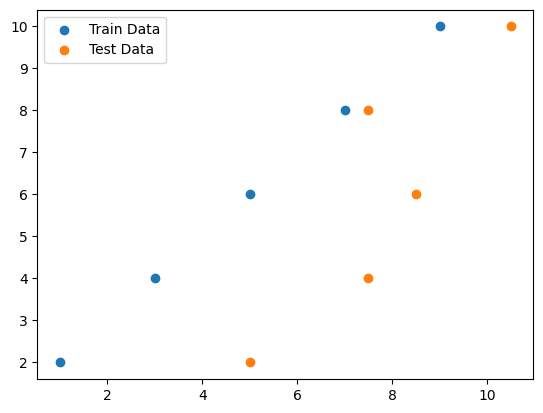

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Train Data') 
# Ploting Line
#plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='red', label='Regression best fit Line')
plt.scatter(X_test,y,label='Test Data')
plt.legend()
plt.show()

**<span style="color:blue"> Linear Regression**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1),y)
y_pred = lr.predict(X.reshape(-1, 1))

In [9]:
mse = mean_squared_error(y,y_pred)
mse_lr = round(mse,6)
mse_lr

0.0

In [10]:
y_pred_lr_t = lr.predict(X_test)
mse_lr_t = round(mean_squared_error(y,y_pred_lr_t),6)
mse_lr_t

10.2

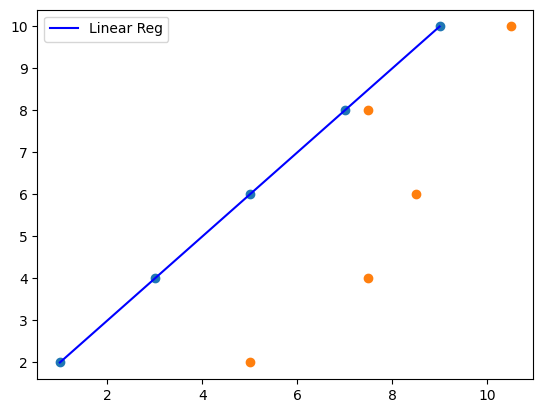

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y) 
# Ploting Line
plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='blue', label='Linear Reg')
plt.scatter(X_test,y)
plt.legend()
plt.show()

**<span style="color:blue"> Ridge Regression or L1**

In [12]:
from sklearn.linear_model import Ridge,RidgeCV

In [13]:
ridge= Ridge(alpha=50)
ridge.fit(X.reshape(-1, 1),y)
y_pred_r = ridge.predict(X.reshape(-1, 1))

In [14]:
mse_r = mean_squared_error(y,y_pred_r)
mse_r

2.4691358024691357

In [15]:
y_pred_r_t = ridge.predict(X_test)
mse_r_t = round(mean_squared_error(y,y_pred_r_t),6)
mse_r_t

6.261728

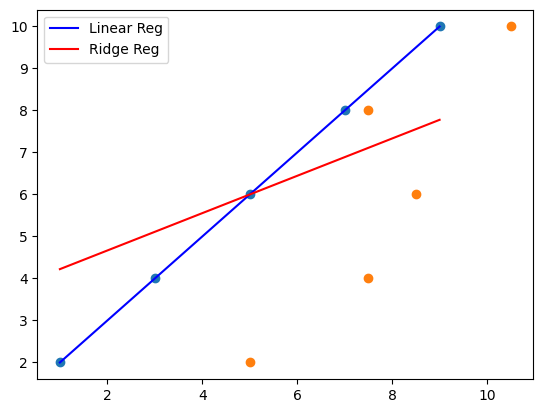

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X, y) 
# Ploting Line
plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='blue', label='Linear Reg')
plt.plot([np.min(X), np.max(X)], [np.min(y_pred_r), np.max(y_pred_r)], color='red', label='Ridge Reg')
plt.scatter(X_test,y)
plt.legend()
plt.show()

**<span style="color:blue"> Lasso Regression or L2**

In [17]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=5)
lasso.fit(X.reshape(-1, 1),y)
y_pred_l = lasso.predict(X.reshape(-1, 1))

In [18]:
mse_l = mean_squared_error(y,y_pred_l)
mse_l

3.125

In [19]:
y_pred_l_t = lasso.predict(X_test)
mse_l_t = round(mean_squared_error(y,y_pred_l_t),6)
mse_l_t

6.246875

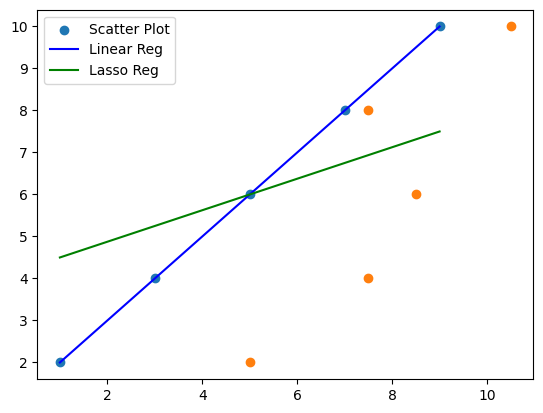

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Scatter Plot') 
# Ploting Line
plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='blue', label='Linear Reg')
plt.plot([np.min(X), np.max(X)], [np.min(y_pred_l), np.max(y_pred_l)], color='green', label='Lasso Reg')
plt.scatter(X_test,y)
plt.legend()
plt.show()

**<span style="color:blue"> Elastic Net Regression or combination of L1 and L2**

In [21]:
from sklearn.linear_model import ElasticNet
elastic= ElasticNet(alpha=100,l1_ratio=0.5)
elastic.fit(X.reshape(-1, 1),y)
y_pred_e = elastic.predict(X.reshape(-1, 1))

In [22]:
mse_e = mean_squared_error(y,y_pred_e)
mse_e

8.0

In [23]:
y_pred_e_t = elastic.predict(X_test)
mse_e_t = round(mean_squared_error(y,y_pred_e_t),6)
mse_e_t

8.0

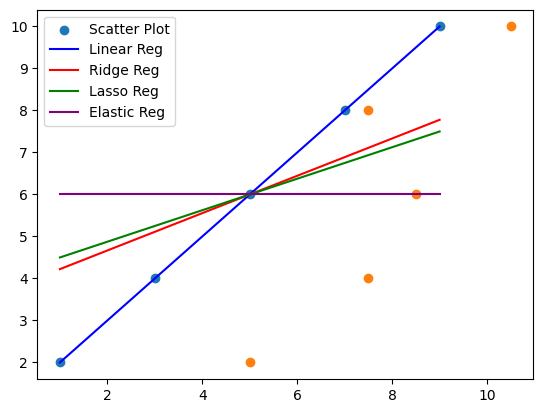

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Scatter Plot') 
# Ploting Line
plt.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='blue', label='Linear Reg')
plt.plot([np.min(X), np.max(X)], [np.min(y_pred_r), np.max(y_pred_r)], color='red', label='Ridge Reg')
plt.plot([np.min(X), np.max(X)], [np.min(y_pred_l), np.max(y_pred_l)], color='green', label='Lasso Reg')
plt.plot([np.min(X), np.max(X)], [np.min(y_pred_e), np.max(y_pred_e)], color='purple', label='Elastic Reg')
plt.scatter(X_test,y)
plt.legend()
plt.show()

### <span style="color:red"> Lets Understand Regularisation using the concrete Dataset

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
# Load a concrete regression dataset
# from yellowbrick.datasets import load_concrete
# https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
from yellowbrick.datasets import load_concrete
X , Y = load_concrete()
# Create the train and test 
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))

(1030, 8)
(1030,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
# Lets Split without scalling data to just verify later the accuracy
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


### Linear Regression Model

In [30]:
## apply linear regression
lin_reg = LinearRegression()
MSE = abs(cross_val_score(lin_reg,X,Y,scoring="neg_mean_squared_error",cv = 5))

In [31]:
## lets take the mean of MSE and display result
mean_MSE = np.mean(MSE)
print("Linear Regression Model MSE : {}".format(mean_MSE))

Linear Regression Model MSE : 128.1129301958169


### Ridge Regression Model

In [32]:
## apply ridge linear regression
## Now we will use GridsearchCV , This will allow us to automatically perform cross-validation 
## with a range of different regularization parameters in order to find the optimal value of 
## alpha(regularization parameter)

ridge = Ridge()
parameter = {"alpha":[1e-15,1e-10,1e-8,1e-5,1e-2,1,5,10,20,30,40,50,70,100]}
ridge_reg = GridSearchCV(ridge,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
ridge_reg.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 70, 100]},
             scoring='neg_mean_squared_error')

In [33]:
### Now get the best MSE and best parameter
print("Ridge Regression Model MSE : {},Best Parameter{}\n".
      format(abs(ridge_reg.best_score_),ridge_reg.best_params_))

Ridge Regression Model MSE : 127.95500167406578,Best Parameter{'alpha': 100}



We can see that there is slightly improvement upon the basic linear regression.

### Lasso Regression Model

In [34]:
## apply Lasso linear regression
lasso = Lasso()
parameter = {"alpha":[1e-10,1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
lasso_reg = GridSearchCV(lasso,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")
lasso_reg.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   70, 100, 110, 120, 130, 140, 150]},
             scoring='neg_mean_squared_error')

In [35]:
### Now get the best MSE and best parameter
print("Lasso Regression Model MSE : {},Best Parameter{}\n".format(abs(lasso_reg.best_score_),lasso_reg.best_params_))

Lasso Regression Model MSE : 122.61666256703415,Best Parameter{'alpha': 10}



We can see that there is slightly improvement upon the basic linear regression.

### Elastic-Net Regression Model

In [36]:
## apply Elasticnet linear regression
elastic = ElasticNet()
parameter = {"max_iter":[1000,1500,2000,3000,5000],"l1_ratio":[0.4,0.5,0.6],
             "alpha":[1e-5,1e-2,1,5,10,20,30,40,50,70,100,110,120,130,140,150]}
elastic_reg = GridSearchCV(elastic,param_grid=parameter,cv=5,scoring="neg_mean_squared_error",)
elastic_reg.fit(X,Y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.01, 1, 5, 10, 20, 30, 40, 50, 70,
                                   100, 110, 120, 130, 140, 150],
                         'l1_ratio': [0.4, 0.5, 0.6],
                         'max_iter': [1000, 1500, 2000, 3000, 5000]},
             scoring='neg_mean_squared_error')

In [37]:
### Now get the best MSE and best parameter
print("Elasticnet Regression Model MSE : {},Best Parameter{}\n".format(abs(elastic_reg.best_score_),elastic_reg.best_params_))

Elasticnet Regression Model MSE : 122.5027078716264,Best Parameter{'alpha': 10, 'l1_ratio': 0.6, 'max_iter': 1000}



As you can see that we are getting more geranilized form of model using Elastic-Net becuase there are more variance in score as we are getting from Ridge and Lasso.
So It is better to use Elastic-Net Regression to get Hybrid Model which will not be to biased with nes unseen data.
That will work better.

#### Lets use train test split and check the distribution of predicted target value

In [38]:
Y_pred_ridge = ridge_reg.predict(X_test)
Y_pred_lasso = lasso_reg.predict(X_test)
Y_pred_elastic_net = elastic_reg.predict(X_test)

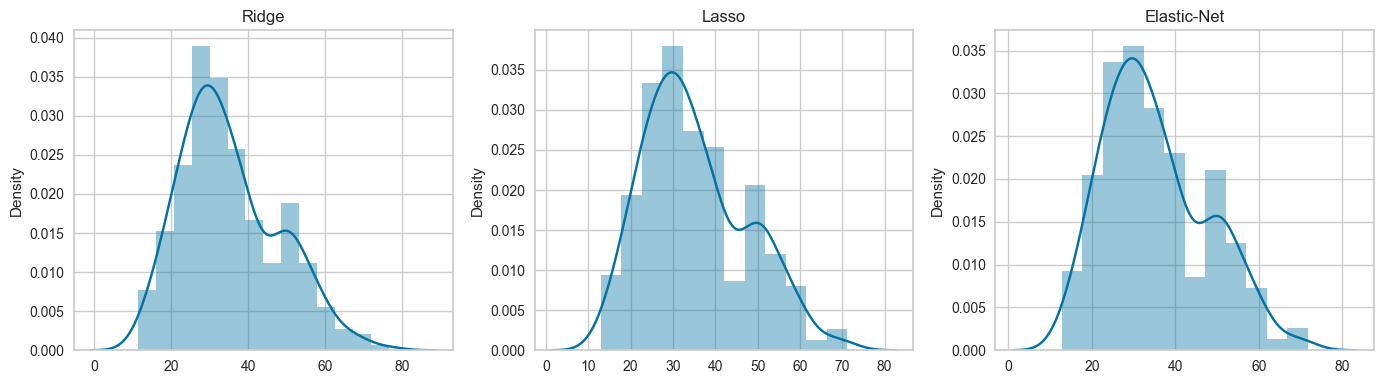

In [39]:
## Plot the distribution plot among these predicted values
plt.figure(figsize= (14,4))
plt.subplot(1, 3, 1)
sns.distplot(Y_pred_ridge)
plt.title("Ridge")

plt.subplot(1, 3, 2)
plt.title("Lasso")
sns.distplot(Y_pred_lasso)

plt.subplot(1, 3, 3)
plt.title("Elastic-Net")
sns.distplot(Y_pred_elastic_net)
plt.tight_layout()
plt.show()

We can observer that Predicted output value is better spread using Elastic-Net Model